# 미니 프로젝트 1

## 프로젝트 구성
프로젝트는 두 개의 데이터셋으로 진행됩니다.
그리고 각 데이터셋으로 아래와 같은 과정을 실습합니다.
1. 비정상 데이터를 정상 데이터로 만들기_AirPassengers 데이터셋 사용 
2. 강의에 활용되었던 분류 모델의 성능 높이기_robot_execution_failures 데이터셋 사용

## 목차
1. 미니 프로젝트 1-1. 비정상 데이터를 정상 데이터로 만들어보기 
2. 결론
3. 미니 프로젝트 1-2. 강의에 활용되었던 분류 모델의 성능 높이기
4. 결론
5. 회고
6. Reference

## 글씨 색 표시
### <span style = "color:orange;">궁금해서 찾아본 부분, 새로 알게 된 것</span>    
### <span style = "color:red;">출력 결과 중 특이사항 표시</span>

## 1. 미니 프로젝트 1-1. 비정상 데이터를 정상 데이터로 만들기 
Step 1. 필요한 데이터 불러오기     
Step 2. 분산을 일정하게 만들기     
Step 3. 차분을 통해 추세 제거하기     
Step 4. 계절 차분을 통해 계절성 제거하기    
Step 5. 검정을 통해 정상성 확인하기

### Step 1. 필요한 데이터 불러오기

In [6]:
# 데이터가 저장된 폴더를 연결
!mkdir -p aiffel/time_series_basic
#!ln -s data/* aiffel/time_series_basic
# !cp data/AirPassengers.csv aiffel/time_series_basic/

In [7]:
#tsfresh 설치
!pip install tsfresh

## <span style = "color:orange;">tsfresh가 뭐죠?</span>
라이브러리    
시계열의 feature를 자동으로 추출    

시계열 노드 4-2에 따르면,     
- 기술 통계학 지표, 비선형성과 복잡도 지표, 기록 압축 지표 등등 각종 지표를 자동으로 추출     
- 논문에 따르면 63개의 시계열 특징 추출 방법론을 활용해 794개의 특징을 포착할 수 있음     
- 현재는 1200개 이상의 특징을 지원하고 있음    

In [ ]:
# 라이브러리 버전 충돌을 피하기 위해 런타임을 재시작
import os
os.kill(os.getpid(), 9)

#### <span style = "color:red;">여기에서는 실행하지 않았습니다.</span>

In [24]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# air passengers 데이터를 불러오기
ap = pd.read_csv('/aiffel/aiffel/time_series_basic/AirPassengers.csv')
ap

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [32]:
# 'Month' column 삭제

ap.drop('Month')
ap

KeyError: "['Month'] not found in axis"

#### <span style = "color:red;">이렇게 하면 에러가 난다</span>      
KeyError: "['Month'] not found in axis"    

axis는 축을 의미하는데, 열을 삭제하고 싶으면 axis =1을 넣어주어야 하기 때문

## <span style = "color:orange;">왜 Month 컬럼을 삭제할까?</span>
시계열 데이터를 보기 위해서는 날짜 정보가 담긴 Month가 아니라    
Passengers 열만 필요하므로

In [33]:
ap.drop('Month', axis = 1)

,#Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [34]:
ap

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


#### <span style = "color:red;">이렇게 하면 출력은 되나 ap를 출력해보면 Month 컬럼이 여전히 보인다</span>      
inplace = True를 해야 원본 데이터(ap)에 적용되기 때문에

## <span style = "color:orange;">inplace 함수란?</span>
inplace = True는 기존 데이터프레임(ap)에 drop을 한 결과를 반영하여 덮어쓰게 된다

In [35]:
# 그래서 최종적으로는
ap.drop('Month', axis = 1, inplace = True)

In [36]:
ap

,#Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


#### <span style = "color:red;">inplace = True 적용 후, Month 컬럼 삭제가 적용되었다</span>      

In [37]:
# ap를 시각화해보기
plt.figure()
# plt.plot(ap)
# plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

## <span style = "color:orange;">plt.figure()</span>
Matplotlib을 줄여서 plt라고 한다    
plt.figure()는 새로운 figure를 생성해준다고 함

## <span style = "color:orange;">figure란?</span>
Matplotlib의 figure 클래스가 있는데    
    
Plot(플롯: 표시하다, 도표를 만들다) = Figure(그림) + Axes(축)    

plt.Figure 클래스는 플롯에 필요한 모든 요소를 가지고 있는 최상위 클래스이다    
(축, 그래프, 텍스트, 레이블을 표시하는 모든 객체를 포함하는 컨테이너)    

plt.figure() 메서드를 실행하여 해당 인스턴스를 생성한다고 한다     
[출처: https://blog.naver.com/icbanq/222973804100]

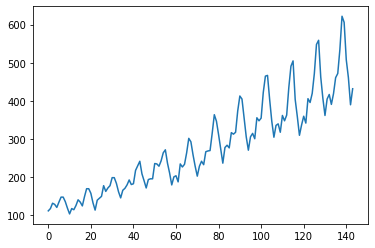

In [39]:
plt.figure()
plt.plot(ap)
# plt.show()

## <span style = "color:orange;">plt.plot()</span>

matplotlib.pyplot은 모듈 이름    
명령어 스타일로 동작하는 함수의 모음


matplotlib.pyplot 모듈의 각각의 함수를 사용해서 간편하게 그래프를 만들고 변화를 줄 수 있다.
[출처: https://wikidocs.net/92071]

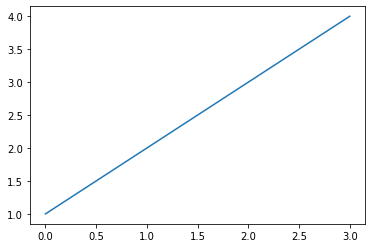

In [42]:
# 예시
plt.plot([1, 2, 3, 4])

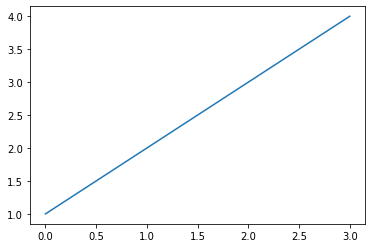

In [44]:
plt.plot([1, 2, 3, 4])
plt.show()

pyplot.plot() 과 plt.plot()은 같은 말 같다     
     
위키독스에 의하면    
pyplot.plot() 함수에 하나의 숫자 리스트를 입력함으로써 위와 같은 그래프가 그려진다    
#### plot() 함수는 리스트의 값들이 y값들이라고 가정하고, x값 [0, 1, 2, 3]을 자동으로 만들어낸다.
matplotlib.pyplot 모듈의 show() 함수는 그래프를 화면에 나타나도록 한다

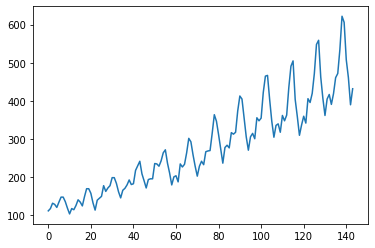

In [40]:
plt.figure()
plt.plot(ap)
plt.show()

In [46]:
ap.sort_values(by=['#Passengers'], ascending=False)

,#Passengers
138,622
139,606
127,559
126,548
137,535
...,...
11,118
12,115
22,114
0,112


#### <span style = "color:red;">plot() 함수는 ()안의 값들이 y값으로 가정하고, x값을 자동으로 만들어 내는지 위 그래프에서도 확인해보자</span>          
- ap의 #Passengers 열을 내림차순으로 정렬함(sort_values(by=['정렬을 할 기준이 되는 열'], ascending=False(내림차순의미)) 사용
- #Passengers의 값은 가장 적은게 104, 많은 값이 622이다.
- 그래프를 다시 보면 y축이 100에서 700까지 되어있는 것을 확인할 수 있다.
- 그렇다면 ply.plot()에서 ()안에 들어오는 값을 y값으로 받는다는 것이 맞는 말임을 확인할 수 있다.
    
           
- x축을 보면 0부터 140까지의 범위를 확인할 수 있다.
- 음.. 내 생각에는 인덱스 번호는 x축으로 받은건가 하는 생각이 든다

### Step 2. 분산을 일정하게 만들기

분산을 일정하게 만들기 위해     
log transformation을 사용
       
       
사용하는 이유는 (노드 출처)
- 큰 수를  같은비율의 작은 수로 만들 수 있기 때문
- 복잡한 계산을 쉽게 만들 수 있기 때문
- 왜도(skewness)와 첨도(kurtosis)를 줄여서 데이터 분석 시 의미있는 결과를 도출하기 위해서

In [47]:
# np.log를 통해서 log transformation
log_transformed = np.log(ap)

In [48]:
log_transformed

,#Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


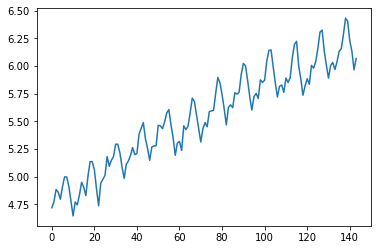

In [49]:
# 분산이 일정해진 것을 눈으로 확인, 시각화
plt.figure()
plt.plot(log_transformed)
plt.show()

### Step 3. 차분을 통해 추세 제거하기

In [50]:
# diff() 함수를 통해 간단하게 차분을 수행할 수 있음
diffed = log_transformed.diff()[1:]

## <span style = "color:orange;">차분(differencing)이란?</span>
시계열 데이터들의 시간상의 차이를 구하는 것

#### AirPassengers 데이터의 경우     
trend 및 계절성이 뚜렷한 시계열이다.     
이러한 데이터들을 Non-stationary라고 한다.     
= 이 말은 비정상성을 띈다고 할 수 있는 것 같다.
          
          
              
차분을 하는 이유는 이러한 trend와 계절성을 띄는 비정상성을 띄는 데이터에서 
#### "trend를 없애기 위해서"

그래서 diff() 함수를 사용한다

-> log transformation을 사용하는 것처럼      
비정상시계열을 정상시계열로 전환하는 방법 중 하나라고 생각하면 될 것 같다


#### <span style = "color:red;"> 위 코드에서 [1:]이 붙은 이유는 1행부터 끝까지라는 의미로 사용된 것 같다</span>  

In [51]:
diffed

,#Passengers
1,0.052186
2,0.112117
3,-0.022990
4,-0.064022
5,0.109484
...,...
139,-0.026060
140,-0.176399
141,-0.097083
142,-0.167251


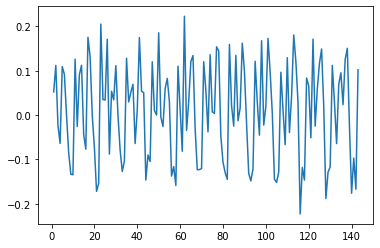

In [52]:
# 시각화
plt.figure()
plt.plot(diffed)
plt.show()

#### <span style = "color:red;">np.log()로 분산을 제거하고, diff()로 차분을 제거한 시각화</span> 
(왜 차분을 제거? trend(추세)를 제외하고 보고싶어서)

### Step 4. 계절 차분을 통해 계절성 제거하기

## <span style = "color:orange;">이거 왜 하는건데?</span>

- AirPassengers 데이터는 12개월을 주기로 하는 계절성이 포함되어 있어서     
= 계절성이 있어서
        

- 이런 경우엔 계절 차분을 통해서 계절성을 데이터에서 제거할 수 있다     
위에서는 trend만 제거했으니 이번에는 계절성을 제거

In [53]:
# diff에 12라는 값을 넣어주면 주기를 12로 하는 계절 차분을 수행할 수 있다고 함
seasonally_diffed = diffed.diff(12)
# 차분을 하면 데이터가 짧아지기 때문에 빈칸을 제거해야 한다고 함
# seasonally_diffed.dropna(inplace = True)

# 위 코드 하나만 실행해봄

In [54]:
seasonally_diffed

,#Passengers
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
...,...
139,-0.045934
140,0.012024
141,0.031830
142,-0.050082


#### <span style = "color:red;">결측치가 있음</span>
#### <span style = "color:red;">그래서 노드에서 차분을 하면 데이터가 짧아지기 때문에 빈칸을 제거해야 한다고 한 것 같다</span>

In [55]:
seasonally_diffed.dropna(inplace = True)

In [56]:
seasonally_diffed

,#Passengers
13,0.039164
14,0.000361
15,-0.020496
16,-0.012939
17,0.066148
...,...
139,-0.045934
140,0.012024
141,0.031830
142,-0.050082


#### <span style = "color:red;">결측치 포함 143행이었는데, 결측치 제거하고 131행이 되었음</span>

In [57]:
type(seasonally_diffed)

pandas.core.frame.DataFrame

## <span style = "color:orange;">dropna()</span>
#### 공식문서에는 remove missing values라고 나와있음

기본설정은
dropna(inplace=False)

inplace=False는 dropna를 한 값을 이전 데이터에 덮어쓰지 않는다는 의미

missing values를 제거하는 거라고 하니까 NaN 값을 빼주는 것 같다

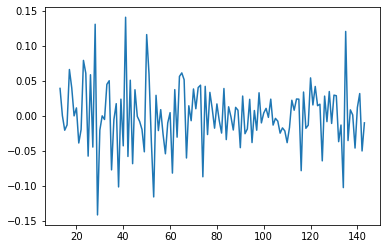

In [58]:
# 시각화
plt.figure()
plt.plot(seasonally_diffed)
plt.show()

### Step 5. 검정을 통해 정상성 확인하기

#### <span style = "color:red;">정상성을 확인하는 방법으로는 무엇이 있을까? </span>

## <span style = "color:orange;">정상성이란?</span>

시간에 상관없이 시계열이 일정한 성질을 띠는 시계열을 지칭     
시간에 상관없이 일정한 것을 의미


평균, 분산 등의 통계적 특성이 변하지 않는 일정한 상태를 의미하며 시계열의 안정적인 수준을 뜻한다      
정상성을 띄게 하려면 평균, 분산이 시간의 흐름에 따라 일정해야 하고,        
시차(lag)에 따른 공분산이 일정해야 한다 [출처: 시계열 노드 2-30]

## <span style = "color:orange;">정상성을 확인하는 방법</span>

1. KPSS 검정
2. ADF 검정

## <span style = "color:orange;">모르는 용어</span>

단위근 검정
귀무가설
대립가설


#### 단위근이란

확률론의 데이터 검정에서 쓰이는 개념
주로 '단위근 검정'의 형식으로 등장한다
[출처: https://rfriend.tistory.com/694]


해당 수식에서 모든 근의 절대값은 1보다 커야 하며, 이 근 중에서 크기가 1인 근을 단위근이라 한다     
확률과정에서 식의 근을 찾을 때, 그리고 단위근이 존재하면 정상성이 아니기 때문에      
단위근을 통해서 정상성을 확인할 수 있다     
[출처: 시계열 노드 2-3]


#### 귀무가설(null hypothesis)

연구에서 검증해야 하는 가설이며      
차이가 없거나 이것이 맞는지 혹은 맞지 않다는 통계학적인 증거를 통해 증명해야 한다



#### 대립가설(alternative hypothesis)

귀무가설이 기각되었을 때 대신 채택되는 가설을 의미한다

[출처: 시계열 노드 2-3]

## <span style = "color:orange;">단위근 검정</span>
대부분의 검정은 단위근 검정이라고 한다

단위근 검정이란 시계열의 확률적 추세 여부를 검정하는 것으로서 단위근의 존재 여부를 귀무가설로 둔다     
#### 단위근이 존재하면, 그 시계열은 비정상 시계열

[출처: https://modulabs.co.kr/blog/time-series-stationarity/]

## <span style = "color:orange;">KPSS 검정</span>

KPSS 검정 역시 일종의 단위근 검정이지만,     
다른 검정들과는 다르게 귀무가설이 ‘시계열 과정이 정상적(Stationary)이다’로 설정되어 있다     
대립 가설은 ‘시계열 과정이 비정상적(non-stationary)이다’로 설정되어 있다     
Python에서는 statsmodels 라이브러리에서 kpss를 import하여 사용할 수 있다


[출처: https://modulabs.co.kr/blog/time-series-stationarity/]

시계열이 평균이나 선형 추세(Linear Trend) 주변에 단위근으로 고정되어 있지 않은지 확인할 수 있으며      
시계열 데이터의 정상성을 검정하는 방법 중 하나이다

[출처: 시계열 노드 2-3]


## <span style = "color:orange;">ADF 검정</span>
     
       
ADF 검정은      
시계열에 단위근(unit root)이 존재하는지의 여부를 결정함으로써 정상시계열인지 여부를 판단한다      
#### 단위근이 존재하면, 그 시계열은 비정상 시계열      
단위근이 존재하지 않으면 정상 시계열이니, 단위근을 확인해보는 방법으로 정상성을 확인할 수 있다     
[출처: https://rfriend.tistory.com/694]


시계열 데이터에서 단위근이 존재하는지의 여부를 찾는 검정 방법으로       
시계열 데이터의 정상성을 검정하는 방법 중 하나이다     
[출처: 시계열 노드 2-3]



## <span style = "color:orange;">ADF 검정의 논리</span>

ADF는 기본적으로, 시계열에 단위근이 존재한다고 가정*, 즉 시계열이 비정상적이라고 가정
#### <span style = "color:red;">-> 그럼 귀무가설이 "이 시계열은 단위근이 존재하므로 비정상 시계열이다." 라는 건가?</span>
검정 결과 귀무가설이 기각된다면(= p-value가 유의수준보다 작다면) 대상 시계열은 정상으로 판단될 수 있다     
검정 결과 귀무가설이 기각되지 않는다면 대상 시계열은 비정상으로 판단된다

[출처: https://playinpap.github.io/easypeasy-time-series-02/]

#### <span style = "color:red;">KPSS 검정은 ADF 검정과는 귀무가설과 대립가설이 정반대이므로 해석에 유의하라고 함</span>

### 노드로 다시 돌아와서_노드는 ADF 검정을 사용

#### adfuller
시계열 데이터를 통계 분석하고 검증할 때 사용

adfuller를 사용하면 대표적으로 다음과 같은 값을 얻을 수 있다고 함

- adf(단위근 검정, Augmented Dickey Fuller) : 정상성을 확인하기 위한 단위근 검정방법
- p-value(유의 검정) : 관찰된 데이터가 귀무가설이 맞다면 통계값 1이 실제로 관측된 값 이상일 확률
- usedlag : 사용된 시차의 수
- nobs : ADF 회귀 및 임계값 계산에 사용된 관측치의 수
- critical values(임계값) : 1%, 5% 및 10% 수준에서 테스트 통계에 대한 임계값
- icbest : 0, 1, …, maxlag 값 중 lag 길이를 자동으로 결정할 때 autolag를 사용하며     
이때 autolag를 none으로 지정할 수 있는데 none으로 지정하지 않는 경우 최대화된 정보 기준


[출처: 시계열 노드 5-1]

In [61]:
from statsmodels.tsa.stattools import adfuller

def adf_test(x): # adf검정을 위한 함수 정의
    stat, p_value, lags, nobs, crit, icb = adfuller(x) # adfuller 함수를 이용하면 6가지 output이 나온다고 함, 이게 위에서 말한 6가지
    print('ADF statistics')
    print(stat) # ADF 검정 통계량
    print('P-value')
    print(p_value) # P-value

In [62]:
# 계절차분까지 수행한 데이터로 adf 테스트를 수행
adf_test(seasonally_diffed)

ADF statistics
-4.443324941831123
P-value
0.0002485912311384052


#### <span style = "color:red;">유의수준 0.01에서 단위근이 존재한다라는 귀무가설을 기각하고 시계열은 정상적이다라는 대립가설을 채택할 수 있습니다</span>

라고 노드에서 이야기함


## <span style = "color:orange;">이게 무슨 뜻일까</span>
#### 위 ADF 검정에 대한 설명에서 단위근이 존재하면 그 시계열은 비정상 시계열이라고 한다      
단위근이 존재한다라는 귀무가설을 기각했다고 하니     
그 말은 단위근이 없다는 뜻     

여기에서 귀무가설은 "단위근이 존재한다"로 한 것 같고     
대립가설은 "시계열은 정상적이다"라고 한 것 같다     

*귀무가설: 연구에서 검증해야하는 가설     
*대립가설: 귀무가설이 기각되었을 때 대신 채택되는 가설     


아 그러면 귀무가설은 "이 시계열은 비정상 시계열이다." 였을까?     
"단위근이 존재한다"였던 거 같기도 하고...


#### <span style = "color:red;">노드의 ADF 검정에 관한 부분에 귀무가설, 대립가설이 나온다</span>     
* 귀무가설: 시계열에 단위근이 존재한다(=단위근이 존재하면 그 시계열은 비정상 시계열이다)      
* 대립가설: 시계열이 정상성을 만족한다


#### 귀무가설을 기각하는 증거가 유의수준 0.01이라는 것인 것 같은데     
이 말은 무슨 말일까 


## <span style = "color:orange;">ADF함수의 결과 해석</span>
이 함수는 adf, pvalue, usedlag, nobs, critical values, icbest 

위에서는 ADF statistics과 P-value만 출력했다




## <span style = "color:orange;">유의수준.. p-value에 대해서 먼저 보면</span>

p-value는 유의확률이라고도 불린다.      
귀무가설이 관찰된 데이터의 통계치와 양립할 수 있는지를 0부터 1까지의 숫자로 나타낸다     
0에 가까울수록 통계치가 귀무가설과의 양립하는 정도가 낮다      
#### *양립하다: 두 가지가 동시에 따로 성립하다


#### <span style = "color:red;"> P-value를 통해 귀무가설을 기각(대립가설을 채택)하기 위해서, 기준을 둔다</span> 
#### <span style = "color:red;">이를 유의수준(significance level)이라고 부른다</span> 


일반적으로 사용되는 값은 0.05나 0.01

     
     
#### <span style = "color:red;">유의수준은 (1- 신뢰도)이다</span> 

유의수준으로 0.05를 이용했을 때의 신뢰도는 0.95 (95%)        
현재 진행중인 분석의 중요도나 엄밀함에 따라서 0.05보다 느슨한(높은) 값을 기준으로 둘 수도 있고            
0.01보다도 까다로운(낮은) 값을 기준으로 둘 수도 있다                 
      
      
예를 들어서, 어떤 시계열이 정상적인지 알고 싶고, 약 95%의 신뢰도로 이를 검정해보고 싶다고 한다          
그래서 ADF 검정을 이용하였고 출력값에 p-value가 0.06이 나왔다       
      
      
ADF 검정의 귀무가설은 '단위근이 존재한다'였다     
그리고 단위근이 존재하면 비정상 시계열이다      
      
       
95%의 신뢰도를 바탕으로 0.05라는 유의수준을 두었는데 출력값의 p-value는 이보다 높게 나왔다(0.06이 나옴)      
이 경우에는 귀무가설을 기각할 수 없다      
      
즉 이 시계열이 정상 시계열이라고 결론 내릴 수 없다     
[출처: https://modulabs.co.kr/blog/time-series-stationarity/]

## <span style = "color:orange;">그럼 다시 노드에서 말한</span>
#### <span style = "color:red;">유의수준 0.01에서 단위근이 존재한다라는 귀무가설을 기각하고 시계열은 정상적이다라는 대립가설을 채택할 수 있습니다</span>


이 말은, 유의수준을 0.01로 기준을 두었고     
ADF 검정을 통해 나온 p-value는 0.0002485912311384052 이었다   
유의수준이 p-value와 같은 말인 것 같은데.. 기준으로 잡은 유의수준 0.01보다 p-value가 작으므로    
또 0에 가까울수록 통계치가 귀무가설과의 양립하는 정도가 낮다고 하므로   
 
-> 귀무가설(이 시계열은 비정상 시계열이다)을 기각할 수 있다    
-> 대립가설(이 시계열은 정상 시계열이다)을 채택할 수 있다

는 의미로 이해

## 2. 결론
1. AirPassengers 데이터셋은 비정상 시계열 데이터이다.
2. 비정상 시계열을 정상 시계열로 만들기 위해 아래와 같은 단계를 진행하였다.
- log 변환으로 분산을 일정하게 만들어주기
- 차분을 통해 trend(추세)를 제거하기
- 계절 차분을 통해 계절성 제거하기
3. ADF 검정을 통해 정상 시계열임을 확인할 수 있었다.

## 3. 미니 프로젝트 1-2. 강의에 활용되었던 분류 모델의 성능 높이기

### <span style = "color:red;">시계열 분류</span>
Step 1. 데이터 다운로드 및 불러오기     
Step 2. 데이터셋 확인(timeseries와 y 확인)      
Step 3. 데이터셋 가공      
Step 4. 데이터셋 나누기     
Step 5. Feature extraction      
Step 6. impute       
Step 7. RandomForest, XGBoost 사용 및 score 확인       
Step 8. XGBoost plot_importance 확인 및 시각화      
Step 9. Classification report를 통한 검증 및 분석 
Step 10. Logistic Regression 사용

### Step 1. 데이터 다운로드 및 불러오기

In [42]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures

download_robot_execution_failures() 

#### <span style = "color:red;">download_robot_execution_failures()</span>

이 친구만 따로 해보니 출력되는 건 없다..    
다운로드 해주는 건가 보다

In [43]:
load_robot_execution_failures()

(      id  time  F_x  F_y  F_z  T_x  T_y  T_z
 0      1     0   -1   -1   63   -3   -1    0
 1      1     1    0    0   62   -3   -1    0
 2      1     2   -1   -1   61   -3    0    0
 3      1     3   -1   -1   63   -2   -1    0
 4      1     4   -1   -1   63   -3   -1    0
 ...   ..   ...  ...  ...  ...  ...  ...  ...
 1315  88    10  -10    2   39  -21  -24    5
 1316  88    11  -11    2   38  -24  -22    6
 1317  88    12  -12    3   23  -24  -24    5
 1318  88    13  -13    4   26  -29  -27    5
 1319  88    14  -13    2   15  -25  -25    6
 
 [1320 rows x 8 columns],
 1      True
 2      True
 3      True
 4      True
 5      True
       ...  
 84    False
 85    False
 86    False
 87    False
 88    False
 Length: 88, dtype: bool)

In [44]:
type(load_robot_execution_failures())

tuple

load_robot_execution_failures()만 따로 출력해보니 위와 같다

이 데이터는 1320*8로 이루어져 있고, 또 1 True, 2 True 같이 데이터가 또 있는 것 같다     
(type은 튜플이라고 나온다)

#### <span style = "color:red;">그래서 노드 코드에서 timeseries, y로 따로 담아주는 것 같다</span>

In [45]:
timeseries, y = load_robot_execution_failures()

### Step 2. 데이터셋 확인(timeseries와 y 확인)

In [46]:
timeseries # id, time을 제외하고 6개 column의 X변수가 나타난다(노드)
# 음.. id와 time은 x 변수에 해당이 안되는거니 참고해서 데이터를 보라는 말?

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0
...,...,...,...,...,...,...,...,...
1315,88,10,-10,2,39,-21,-24,5
1316,88,11,-11,2,38,-24,-22,6
1317,88,12,-12,3,23,-24,-24,5
1318,88,13,-13,4,26,-29,-27,5


In [47]:
y

1      True
2      True
3      True
4      True
5      True
      ...  
84    False
85    False
86    False
87    False
88    False
Length: 88, dtype: bool

### Step 3. 데이터셋 가공

In [48]:
def custom_classification_split(x,y,test_size=0.3): # 수업 때 보았던 custom split 함수
    
    num_true = int(y.sum()*test_size)
    num_false = int((len(y)-y.sum())*test_size)
    
    id_list = y[y==False].head(num_false).index.to_list() + y[y==True].head(num_true).index.to_list()
    
    y_train = y.drop(id_list) # [[YOUR CODE]] 
    y_test = y.iloc[id_list].sort_index() # [[YOUR CODE]]
    X_train = timeseries[~timeseries['id'].isin(id_list)] # [[YOUR CODE]]
    X_test = timeseries[timeseries['id'].isin(id_list)] # [[YOUR CODE]]
    
    return X_train, y_train, X_test, y_test

id를 기준으로 하기 때문에 사이킷런의 데이터 나누기 함수를 사용하지 못하고    
함수를 새로 정의해 줌    
    
X_train = timeseries[~timeseries['id'].isin(id_list)]     
이 부분의 ~는 노드에서        
#### <span style = "color:red;">안에 조건이 포함되어 있지 않는 것만 사용한다는 의미라고 함</span>

## <span style = "color:orange;">.isin()</span>

요소가 df 또는 Series에 포함되는지 검사    
DataFrame.isin(values)

### Step 4. 데이터셋 나누기

In [49]:
# test set의 비율을 0.25로 지정해주세요.
X_train, y_train, X_test, y_test = custom_classification_split(timeseries, y, test_size = 0.25)

#### <span style = "color:red;">tsfresh의 EfficientParameters을 사용</span>
* tsfresh는 시계열의 feature를 자동으로 추출해주는 라이브러리

EfficientParameters는 큰 계산비용이 필요한 calculator를 제외하고 가능한 모든 특징을 생성해준다고 한다

In [50]:
from tsfresh import extract_features
from tsfresh.feature_extraction import EfficientFCParameters
from tsfresh.utilities.dataframe_functions import impute

settings = EfficientFCParameters()

In [51]:
settings

{'variance_larger_than_standard_deviation': None, 'has_duplicate_max': None, 'has_duplicate_min': None, 'has_duplicate': None, 'sum_values': None, 'abs_energy': None, 'mean_abs_change': None, 'mean_change': None, 'mean_second_derivative_central': None, 'median': None, 'mean': None, 'length': None, 'standard_deviation': None, 'variation_coefficient': None, 'variance': None, 'skewness': None, 'kurtosis': None, 'root_mean_square': None, 'absolute_sum_of_changes': None, 'longest_strike_below_mean': None, 'longest_strike_above_mean': None, 'count_above_mean': None, 'count_below_mean': None, 'last_location_of_maximum': None, 'first_location_of_maximum': None, 'last_location_of_minimum': None, 'first_location_of_minimum': None, 'percentage_of_reoccurring_values_to_all_values': None, 'percentage_of_reoccurring_datapoints_to_all_datapoints': None, 'sum_of_reoccurring_values': None, 'sum_of_reoccurring_data_points': None, 'ratio_value_number_to_time_series_length': None, 'maximum': None, 'absolu

#### <span style = "color:red;">헉 출력해보니.. 이렇게 많은 것들이 나온다..</span>

### Step 5. Feature extraction (특징 추출)

In [52]:
comprehensive_features_train = extract_features(
                                    X_train, 
                                    column_id="id",
                                    column_sort="time",
                                    default_fc_parameters=settings
                                          )

Feature Extraction: 100%|██████████| 402/402 [00:15<00:00, 25.61it/s]


코드를 보니 X_train 데이터에 대해서 특징을 추출하는 것 같다. 
#### <span style = "color:red;">기준은 id로 잡고, 정렬은 time으로...?</span>

In [53]:
# X_test에 대해서도 진행
comprehensive_features_test = extract_features(
                                    X_test, 
                                    column_id="id",
                                    column_sort="time",
                                    default_fc_parameters=settings
                                          )

Feature Extraction: 100%|██████████| 126/126 [00:05<00:00, 24.33it/s]


### Step 6. impute
impute: (성질, 속성 등을) 귀속시키다

In [54]:
impute(comprehensive_features_train)

/opt/conda/lib/python3.9/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'
 'T_z__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
6,1.0,1.0,1.0,1.0,-15.0,39.0,1.714286,0.142857,0.153846,-1.0,...,0.974315,1.213008,1.732868,1.438883,1.863680,2.145842,2.163956,2.197225,0.0,0.714286
7,0.0,1.0,0.0,1.0,-13.0,21.0,0.928571,0.214286,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.043794,1.349792,1.666333,1.748067,1.831020,0.0,0.428571
8,1.0,0.0,1.0,1.0,-10.0,26.0,1.142857,-0.142857,0.192308,-1.0,...,1.494175,1.732868,2.079442,1.412745,2.138333,2.397895,2.302585,2.197225,0.0,1.285714
9,1.0,0.0,0.0,1.0,-10.0,24.0,1.428571,0.000000,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.479133,2.138333,2.397895,2.302585,2.197225,0.0,1.285714
10,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,0.000000,-1.0,...,0.937285,1.213008,1.906155,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,1.0,0.0,1.0,-1073.0,96833.0,7.142857,-5.428571,-0.038462,-98.0,...,0.735622,0.735622,1.386294,1.585771,2.253858,2.397895,2.302585,2.197225,0.0,24.285714
85,1.0,0.0,1.0,1.0,143.0,1683.0,1.357143,1.071429,0.076923,8.0,...,0.735622,0.735622,1.667462,1.332245,1.589027,1.893788,2.163956,2.197225,0.0,5.571429
86,1.0,0.0,0.0,0.0,961.0,83497.0,9.071429,9.071429,0.807692,52.0,...,0.735622,1.073543,1.732868,0.687092,0.983088,1.159589,1.227529,1.303092,0.0,9.285714
87,1.0,1.0,0.0,1.0,4509.0,1405437.0,12.928571,12.214286,-1.038462,338.0,...,0.735622,0.735622,1.386294,0.535961,0.836988,1.159589,1.497866,1.581094,0.0,40.285714


In [55]:
impute(comprehensive_features_test)

/opt/conda/lib/python3.9/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'
 'T_z__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
1,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,-0.038462,-1.0,...,1.073543,1.440235,2.079442,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000
2,0.0,1.0,1.0,1.0,-13.0,25.0,1.000000,0.000000,-0.038462,-1.0,...,1.073543,1.494175,2.079442,0.937156,1.234268,1.540306,1.748067,1.831020,0.0,0.571429
3,0.0,0.0,1.0,1.0,-10.0,12.0,0.714286,0.000000,-0.038462,-1.0,...,1.386294,1.732868,2.079442,1.265857,1.704551,2.019815,2.163956,2.197225,0.0,0.571429
4,0.0,1.0,1.0,1.0,-6.0,16.0,1.214286,-0.071429,-0.038462,0.0,...,1.073543,1.494175,2.079442,1.156988,1.907284,2.397895,2.302585,2.197225,0.0,1.000000
5,0.0,0.0,0.0,1.0,-9.0,17.0,0.928571,-0.071429,0.038462,-1.0,...,0.900256,1.320888,2.079442,1.156988,1.863680,2.271869,2.302585,2.197225,0.0,0.857143
19,1.0,0.0,0.0,1.0,99.0,6109.0,13.928571,-1.928571,-1.730769,1.0,...,0.974315,1.494175,1.906155,1.230932,1.704551,2.019815,2.025326,2.043192,0.0,1.428571
20,1.0,0.0,1.0,1.0,155.0,34455.0,16.714286,-13.142857,7.576923,-1.0,...,1.386294,1.667462,2.079442,1.564957,2.022809,2.271869,2.302585,2.197225,0.0,2.571429
21,1.0,0.0,0.0,1.0,-171.0,16495.0,20.928571,1.785714,3.961538,-1.0,...,0.735622,0.735622,0.735622,1.303876,1.791759,2.271869,2.302585,2.197225,0.0,17.285714
22,1.0,0.0,0.0,1.0,102.0,12700.0,10.785714,-8.071429,4.500000,-1.0,...,0.562335,0.735622,1.732868,1.524707,2.138333,2.397895,2.302585,2.197225,0.0,5.428571
23,1.0,0.0,0.0,1.0,67.0,10593.0,15.142857,-7.000000,3.000000,-3.0,...,0.974315,1.255482,2.079442,1.519383,2.369382,2.397895,2.302585,2.197225,0.0,3.714286


### Step 7. RandomForest, XGBoost 사용 및 score 확인

### RandomForest 모델로 학습시키기

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 10, max_depth = 3)

rf_clf.fit(comprehensive_features_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [57]:
rf_clf.score(comprehensive_features_test, y_test)

0.8095238095238095

#### <span style = "color:red;">노드에서는 test셋에 적합해본 결과 약 0.66의 정확도를 보인다고 하는데..</span>
나는 0.8095238095238095이 나온다

### XGBoost 모델로 학습시키기

In [59]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators = 10, max_depth = 3)

xgb_clf.fit(comprehensive_features_train, y_train)

/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:17:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
xgb_clf.score(comprehensive_features_test, y_test)

1.0

### Step 8. XGBoost plot_importance 확인 및 시각화

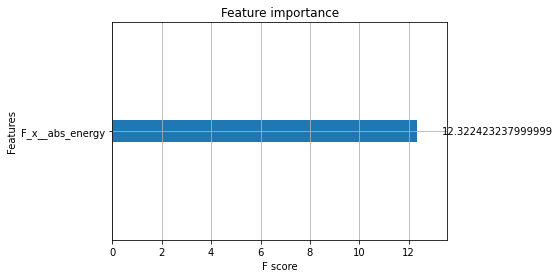

In [61]:
# plot_importance를 통해 어떤 변수(특징)가 가장 유의미한지 확인
xgb.plot_importance(xgb_clf, importance_type = 'gain')
plt.show()

## <span style = "color:orange;">plot_importance()</span>

#### <span style = "color:red;">plot_importance는 꼭 xgboost에서만 사용하는 건 아니라는 걸 알게 되었다</span>

#### <span style = "color:red;">feature_importance도 있는데 간략히 둘의 차이는</span>

plot_importance 시각적으로 중요도를 표현하는 그래프를 생성      
feature_importance 특성 중요도의 값을 반환

RandomForest 모델로도 해 봄

In [20]:
rf.plot_importance(rf_clf, importance_type = 'gain')
plt.show()

NameError: name 'rf' is not defined

In [21]:
RandomForestClassifier.plot_importance(rf_clf, importance_type = 'gain')
plt.show()

AttributeError: type object 'RandomForestClassifier' has no attribute 'plot_importance'

음.. 안 된다   
RandomForest는 plot_importance를 못 그리는 건가...?

In [62]:
sum(xgb_clf.feature_importances_ != 0) 

1

#### <span style = "color:red;">노드에서는 Fx 값의 abs_energy 특징만의 유의미하다고 하는데.. 잘 이해가 되지 않는다</span>    
어찌되었던, 중요한 feature는 F_X_abs_energy

### Step 9.  Classification report를 통한 검증 및 분석
#### <span style = "color:red;">XGBoost의 결과로 진행</span>    

In [63]:
from sklearn.metrics import classification_report

classification_report(y_test, xgb_clf.predict(comprehensive_features_test), target_names = ['true', 'false'], output_dict = True)

{'true': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 16},
 'false': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 21},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 21}}

#### <span style = "color:red;">RandomForest로 진행</span>    

In [58]:
from sklearn.metrics import classification_report

classification_report(y_test, rf_clf.predict(comprehensive_features_test), target_names = ['true', 'false'], output_dict = True)

{'true': {'precision': 1.0,
  'recall': 0.75,
  'f1-score': 0.8571428571428571,
  'support': 16},
 'false': {'precision': 0.5555555555555556,
  'recall': 1.0,
  'f1-score': 0.7142857142857143,
  'support': 5},
 'accuracy': 0.8095238095238095,
 'macro avg': {'precision': 0.7777777777777778,
  'recall': 0.875,
  'f1-score': 0.7857142857142857,
  'support': 21},
 'weighted avg': {'precision': 0.8941798941798942,
  'recall': 0.8095238095238095,
  'f1-score': 0.8231292517006802,
  'support': 21}}

### Step 10. Logistic Regression 모델로 학습시키기

In [30]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures

download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [32]:
def custom_classification_split(x, y, test_size=0.3):
    num_true = int(y.sum()*test_size)           
    num_false = int((len(y)-y.sum())*test_size) 

    id_list = y[y==False].head(num_false).index.to_list() + y[y==True].head(num_true).index.to_list()


    y_train = y.drop(id_list)                              
    y_test = y.iloc[id_list].sort_index()               
    X_train = timeseries[~timeseries['id'].isin(id_list)] 
    X_test = timeseries[timeseries['id'].isin(id_list)]   

    return X_train, y_train, X_test, y_test

In [33]:
X_train, y_train, X_test, y_test = custom_classification_split(timeseries, y)

In [34]:
from tsfresh import extract_features
from tsfresh.feature_extraction import MinimalFCParameters

settings = MinimalFCParameters() # 계산 효율을 위해 minimal 셋팅
minimal_features_train = extract_features(
                                X_train,
                                column_id="id",
                                column_sort="time",
                                default_fc_parameters=settings # minimal 적용
                           )

minimal_features_test = extract_features(
                                X_test,
                                column_id="id",
                                column_sort="time",
                                default_fc_parameters=settings # minimal 적용
                           )

Feature Extraction: 100%|██████████| 156/156 [00:00<00:00, 2942.43it/s]


In [35]:
minimal_features_train
minimal_features_train.columns

Index(['F_x__sum_values', 'F_x__median', 'F_x__mean', 'F_x__length',
       'F_x__standard_deviation', 'F_x__variance', 'F_x__root_mean_square',
       'F_x__maximum', 'F_x__absolute_maximum', 'F_x__minimum',
       'F_y__sum_values', 'F_y__median', 'F_y__mean', 'F_y__length',
       'F_y__standard_deviation', 'F_y__variance', 'F_y__root_mean_square',
       'F_y__maximum', 'F_y__absolute_maximum', 'F_y__minimum',
       'F_z__sum_values', 'F_z__median', 'F_z__mean', 'F_z__length',
       'F_z__standard_deviation', 'F_z__variance', 'F_z__root_mean_square',
       'F_z__maximum', 'F_z__absolute_maximum', 'F_z__minimum',
       'T_x__sum_values', 'T_x__median', 'T_x__mean', 'T_x__length',
       'T_x__standard_deviation', 'T_x__variance', 'T_x__root_mean_square',
       'T_x__maximum', 'T_x__absolute_maximum', 'T_x__minimum',
       'T_y__sum_values', 'T_y__median', 'T_y__mean', 'T_y__length',
       'T_y__standard_deviation', 'T_y__variance', 'T_y__root_mean_square',
       'T_y__maximu

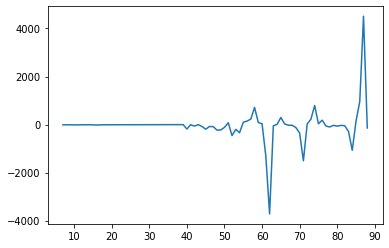

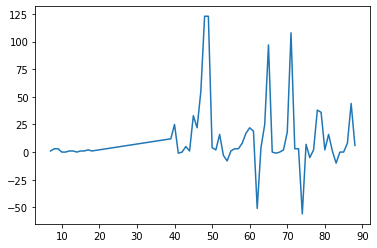

In [36]:
plt.plot(minimal_features_train['F_x__sum_values'])
plt.show()
plt.plot(minimal_features_train['T_z__maximum'])
plt.show()

In [37]:
logistic = LogisticRegression() 
logistic.fit(minimal_features_train, y_train)

LogisticRegression()

In [38]:
logistic.score(minimal_features_test, y_test)

0.6923076923076923

In [39]:
classification_report(y_test, logistic.predict(minimal_features_test), target_names=['true', 'false'], output_dict=True)

{'true': {'precision': 1.0,
  'recall': 0.6,
  'f1-score': 0.7499999999999999,
  'support': 20},
 'false': {'precision': 0.42857142857142855,
  'recall': 1.0,
  'f1-score': 0.6,
  'support': 6},
 'accuracy': 0.6923076923076923,
 'macro avg': {'precision': 0.7142857142857143,
  'recall': 0.8,
  'f1-score': 0.6749999999999999,
  'support': 26},
 'weighted avg': {'precision': 0.868131868131868,
  'recall': 0.6923076923076923,
  'f1-score': 0.7153846153846153,
  'support': 26}}

## 4. 결론
1. 사용한 데이터셋은 robot_execution_failures
2. Logistic Regression, RandomForest, XGBoost 세 가지 모델 사용
3. 점수(모델별 자세한 점수는 아래 참고) 
- Logistic Regression_Accuracy: 0.6923076923076923
- RandomForest_Accuracy: 0.8095238095238095
- XGBoost_Accuracy: 1.0
4. XGBoost가 모델 학습이 더 잘 되었다
5. XGBoost_plot_importance로 중요한 feature는 F_X_abs_energy임을 알 수 있었다

In [39]:
# Logistic Regression
classification_report(y_test, logistic.predict(minimal_features_test), target_names=['true', 'false'], output_dict=True)

{'true': {'precision': 1.0,
  'recall': 0.6,
  'f1-score': 0.7499999999999999,
  'support': 20},
 'false': {'precision': 0.42857142857142855,
  'recall': 1.0,
  'f1-score': 0.6,
  'support': 6},
 'accuracy': 0.6923076923076923,
 'macro avg': {'precision': 0.7142857142857143,
  'recall': 0.8,
  'f1-score': 0.6749999999999999,
  'support': 26},
 'weighted avg': {'precision': 0.868131868131868,
  'recall': 0.6923076923076923,
  'f1-score': 0.7153846153846153,
  'support': 26}}

In [58]:
#RandomForest
from sklearn.metrics import classification_report

classification_report(y_test, rf_clf.predict(comprehensive_features_test), target_names = ['true', 'false'], output_dict = True)

{'true': {'precision': 1.0,
  'recall': 0.75,
  'f1-score': 0.8571428571428571,
  'support': 16},
 'false': {'precision': 0.5555555555555556,
  'recall': 1.0,
  'f1-score': 0.7142857142857143,
  'support': 5},
 'accuracy': 0.8095238095238095,
 'macro avg': {'precision': 0.7777777777777778,
  'recall': 0.875,
  'f1-score': 0.7857142857142857,
  'support': 21},
 'weighted avg': {'precision': 0.8941798941798942,
  'recall': 0.8095238095238095,
  'f1-score': 0.8231292517006802,
  'support': 21}}

In [63]:
#XGBoost
from sklearn.metrics import classification_report

classification_report(y_test, xgb_clf.predict(comprehensive_features_test), target_names = ['true', 'false'], output_dict = True)

{'true': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 16},
 'false': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 21},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 21}}

## 5. 회고

### 1. 프로젝트에서 어려웠던 점, 해결을 위해 시도한 방법, 문제해결에 성공한 이유 또는 실패한 이유

- **프로젝트에서 어려웠던 점**  
    1. 시계열 데이터를 다루는 전체 프로세스
    2. ADF 검정 등 새로 보는 용어들


- **해결을 위해 시도한 방법**  
    노드의 내용만으로는 이해하기 어려워 다른 참고 자료들을 많이 찾아보며 공부했습니다.
     

- **문제해결에 성공한 이유 또는 실패한 이유**  
    시간을 많이 들여 궁금한 부분은 하나씩 파고들며 공부했습니다.     
    그래서 처음 프로젝트를 시작할 때보다 더 많이 이해하게 된 것 같습니다. 

### 2. 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점

- **프로젝트를 진행하면서 알아낸 점**

1. inplace()    
2. plt.figure()     
3. plt.plot()의 작동 원리    
4. 차분을 하는 이유      
5. dropna()     
6. 정상성, 귀무가설, 대립가설, 단위근의 의미     
7. KPSS, ADF 검정의 뜻과 내용     
8. p-value, 유의수준의 뜻과 내용     
9. ADF 검정결과 해석하는 방법     
10. isin()     
11. plot_importance()     

- **아직 모호한 점**

1. p-value = 유의확률 = 유의수준?

2. 왜 xgb에 대해서만 plot_importance를 하는 걸까

3. RandomForest는 plot_importance를 못 그리는 건가...?

### 3. 자기 다짐, 프로젝트를 진행하면서 느낀 점

시계열 데이터를 이해하고 분석하는게 정말 노드의 내용만 봤을 때에는 어려웠습니다.    
시간이 많이 걸렸지만, 다른 참고 자료들을 통해 이전보다 시계열 데이터의 분석과정을 더 이해하게 된 것이 가장 큰 수확인 것 같습니다. 

## 참고한 레퍼런스

<span style = "color:gray;">판다스 inplace=True</span>     
https://blog.naver.com/toynbe99/222861390554

<span style = "color:gray;">Matplotlib에서 figure란_1</span>     
https://blog.naver.com/icbanq/222973804100

<span style = "color:gray;">Matplotlib에서 figure란_2</span>   
https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=jung2381187&logNo=220408468960

<span style = "color:gray;">matplotlib - plt.plot()</span>       
https://wikidocs.net/92071

<span style = "color:gray;">차분에 대해</span>       
https://blog.naver.com/kebkeeper/222878413912

<span style = "color:gray;">dropna()</span>       
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html?highlight=dropna#pandas.DataFrame.dropna

<span style = "color:gray;">단위근, KPSS 검정, ADF 검정</span>       
https://rfriend.tistory.com/694

<span style = "color:gray;">kpss, adf</span>       
https://modulabs.co.kr/blog/time-series-stationarity/

<span style = "color:gray;">kpss, adf</span>      
https://syj9700.tistory.com/30

<span style = "color:gray;">시계열 분석</span>      
https://kerpect.tistory.com/161

<span style = "color:gray;">ADF 검정의 논리</span>      
https://playinpap.github.io/easypeasy-time-series-02/

<span style = "color:gray;">plot_importance</span>       
https://zephyrus1111.tistory.com/272

<span style = "color:gray;">plot_importance, feature_importance 비교 </span>      
https://blog.naver.com/charzim0611/223054446788

<span style = "color:gray;">pandas isin</span>     
https://blog.naver.com/charzim0611/222897201000